# Tokenization

Load the text "The Time Machine" by H.G. Wells from your txt-file into a string variable.

## Familiarize with NLTK 
- install it into your environment
- find the methods word_tokenize and sent_tokenize
- your will realize that you need to do more installation steps on the first use

Warmup 
- Subdivide the text into sentences using the nltk.sent_tokenize method.
- Compare the sentences to those you have found manually using regex.
- Subdivide the text into words.
- Repeat the sentence tokenization with the text completely switched to lower case. What do you recognize? 


In [5]:
import nltk

nltk.download('punkt')

with open("time_machine.txt") as file:
    text = file.read()
    sentences = nltk.sent_tokenize(text)
    words = nltk.word_tokenize(text)
    sentences_low = nltk.sent_tokenize(text.lower())

[nltk_data] Downloading package punkt to /home/lukas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


A little bit of analysis!

Which sentences are different in sent_lower (don't forget to add the lower case transformation!)

Within the first couple of sentences you already find one case where the sentence tokenization deviates for lower case and normal text. Comment on your finding.

**Homework**: Compare the sentences found by nltk.sent_tokenize to your manually found sentences from the previous notebook. 

## Word tokenization

Use the NLTK word tokenizer. 
- First, familiarize how it handles special situations like those mentioned in the lecture: ellipsis, IP addresses, decimal numbers, clitic contractions and others you are thinking of. Create a text containing all these things and tokenize it.

- Use the NLTK word_tokenize function to subdivide The Time Machine into words.
- Tokenize The Time Machine using a regex-based word tokenizer. Compare the results by counting occurrences of words in both versions and comparing the counts. 


In [20]:
import nltk

str = "This sentence cost $20, which is a lot compared to... When connecting to Adress 101.101.101.101 23 errors where found in the error-log.)"

str_words = nltk.word_tokenize(str)
print(str_words)

with open("time_machine.txt") as file:
    text = file.read()
    words = nltk.word_tokenize(text)
    print(len(words))

pattern = r'''(?x)(?:[A-Z]\.)+
        | \w+(?:-\w+)*
        | \$?\d+(?:\.\d+)?%?
        | \.\.\.
        | [][.,;"'?():-_′]'''

words_regex = nltk.regexp_tokenize(text, pattern)
print(len(words_regex))

['This', 'sentence', 'cost', '$', '20', ',', 'which', 'is', 'a', 'lot', 'compared', 'to', '...', 'When', 'connecting', 'to', 'Adress', '101.101.101.101', '23', 'errors', 'where', 'found', 'in', 'the', 'error-log', '.', ')']
41040
40591


### Wordcloud
A good visualization of texts is the so-called word cloud. 
It shows all words that occur but with different text sizes depending on the number of occurrences. 

- Create a word cloud for The Time Machine
- Install (if not already done) WordCloud Python-Package first and plot your results with matplotlib (imshow function)

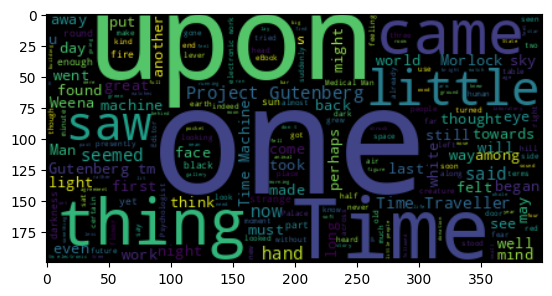

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

with open("time_machine.txt") as file:
    text = file.read()
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')


## Lemmatization

- Perform lemmatization on The Time Machine. Use the 
    - Porter stemmer
    - Lancester stemmer
    - WordNet lemmatizer

- Compare your results with the original text.
- For all word stems created by the Porter stemmer, which are not included in the stems from Lancaster find the most similar stem by considering the edit distance (use NLTK).


In [14]:
import nltk
from nltk.stem import *
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.metrics.distance import edit_distance

nltk.download('punkt')
nltk.download('wordnet')

stemmer = PorterStemmer()
stemmerLan = LancasterStemmer()
stemmerWord= WordNetLemmatizer()

with open("time_machine.txt") as file:
    text = file.read()
    words = nltk.word_tokenize(text)
    stemmed = set([stemmer.stem(word) for word in words])
    stemmedLan = set([stemmerLan.stem(word) for word in words])
    stemmedWord = set([stemmerWord.lemmatize(word) for word in words])
    
    print(f'words: {len(words)}')
    print(f'porter: {len(stemmed)}')
    print(f'lancaster: {len(stemmedLan)}')
    print(f'wordnet: {len(stemmedWord)}')
    

[nltk_data] Downloading package punkt to /home/lukas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lukas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


words: 41040
porter: 4045
lancaster: 3618
wordnet: 5348
